In [15]:
from google.colab import files
uploaded = files.upload()


Saving iris.data to iris (1).data


In [12]:
import zipfile

with zipfile.ZipFile("iris.zip", "r") as zip_ref:
    zip_ref.extractall("iris_data")  # Extract into a folder


In [4]:
pip install matplotlib

In [1]:
pip install pandas

In [3]:
pip install seaborn

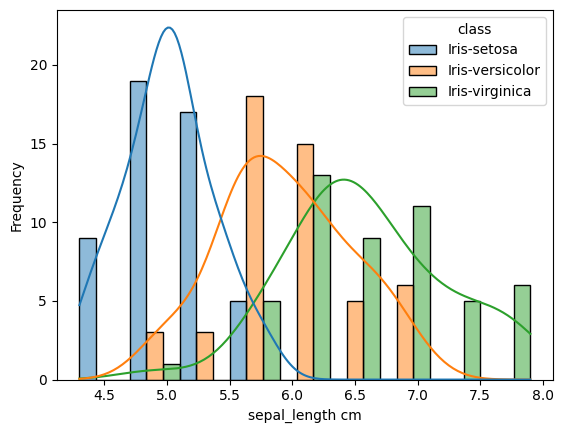

Text(0, 0.5, 'Sepal Width (cm)')

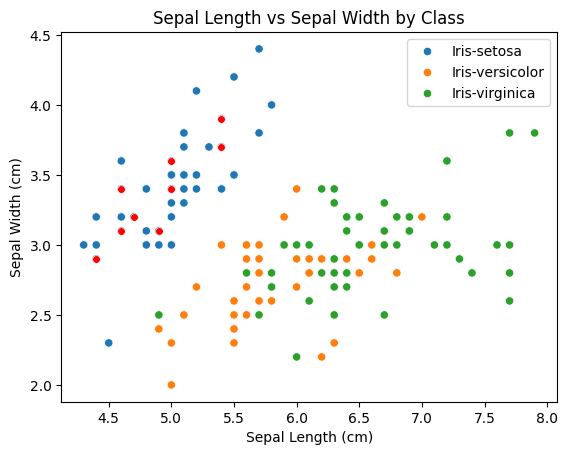

In [18]:
# Load some data into a DataFrame:
import pandas as pd
column_names = ["sepal_length", "sepal_width", "petal_length",
"petal_width", "class"]
df = pd.read_csv('iris.data', header=None, names=column_names)


import seaborn as sns
from matplotlib import pyplot as plt
sns.histplot(data=df, x='sepal_length', hue='class', kde=True, multiple='dodge')
plt.xlabel('sepal_length cm')
plt.ylabel('Frequency')
plt.show()

subset = df.iloc[2:11]

sns.scatterplot(data=df, x='sepal_length',
y='sepal_width', hue='class')
sns.scatterplot(data=subset, x='sepal_length',
y='sepal_width', marker='o', s=30, color='red')
plt.title('Sepal Length vs Sepal Width by Class')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

Class Disccusions
1)When looking at the individual features of the Iris data, are there any indications of patterns that could be exploited by a machine learning model?

Looking at the histogram and scatterplot, we can see that Iris-setosa has smaller sepal lengths, Iris-virginica has larger sepal lengths, and Iris-versicolor falls in between. This shows that sepal length (and to some extent sepal width) has patterns that a machine learning model could use to separate species.

2) Based on your broad observations, can you think of a simple rule that could separate the species?

A simple rule could be:

Sepal length < 5 cm → predict setosa

Sepal length > 6 cm → predict virginica

Sepal length 5–6 cm → predict versicolor


3) [link text](https://)Are the different species of Iris in the data set linearly separable? (can you draw a straight line between them?)

From the scatterplot, Iris-setosa can be separated from the other species with a straight line, but Iris-versicolor and Iris-virginica overlap, so you cannot draw a straight line that perfectly separates all species using only sepal features. Combining multiple features would improve separability.

Accuracy: 0.9666666666666667
Precision: 0.9690476190476189
Recall: 0.9666666666666667
F1 Score: 0.9660018993352326


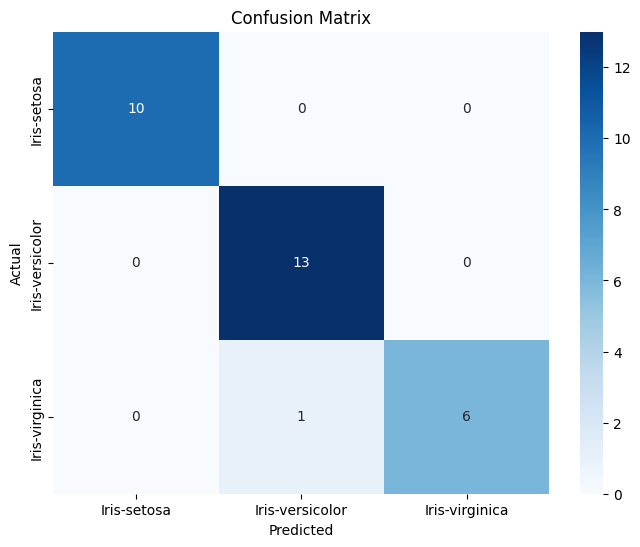

In [19]:
# Load dataset
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(url, header=None, names=column_names)

# Build kNN model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1477)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Test and score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_model.classes_,
            yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Questions
1)Does the knn model correctly predict all the instances of Iris? Does it do well?

The kNN model does not predict all instances of the Iris dataset perfectly.

2) If it does go wrong, what might be the reason?

It sometimes misclassifies Iris-versicolor and Iris-virginica because their features overlap, making it hard for the model to distinguish between them.



In [21]:
#Part 2 Unsupervised Learning
# Use k-means to find 3 clusters:
from sklearn.cluster import KMeans
X_cluster = df[['sepal_length', 'sepal_width', 'petal_length',
'petal_width']]
kmeans = KMeans(n_clusters=3, random_state=1477, n_init=10)
kmeans.fit(X_cluster)
df['cluster'] = kmeans.labels_

pd.crosstab(df['cluster'], df['class'])

class,Iris-setosa,Iris-versicolor,Iris-virginica
cluster,,,
0,0,2,36
1,50,0,0
2,0,48,14


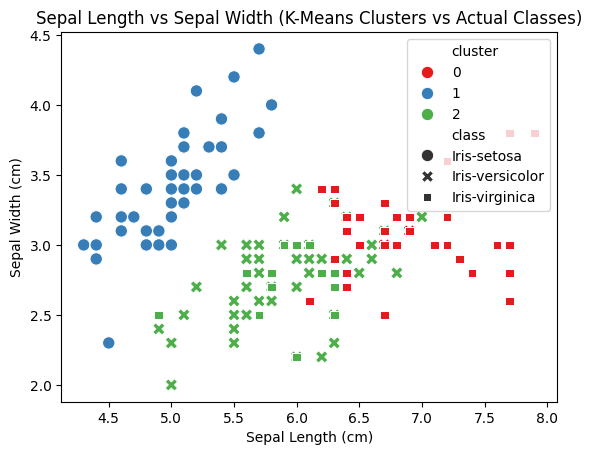

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with clusters as color and actual class as marker style
sns.scatterplot(
    data=df,
    x='sepal_length',
    y='sepal_width',
    hue='cluster',       # show k-means clusters
    style='class',       # show actual species
    palette='Set1',      # nice color palette
    s=80                 # size of the points
)

plt.title('Sepal Length vs Sepal Width (K-Means Clusters vs Actual Classes)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


Questions
1)Does the k-means clustering provide an accurate model of the different speciesfound in the dataset?

K-means clustering is partially accurate. It separates Iris-setosa well but sometimes mixes Iris-versicolor and Iris-virginica because their features overlap.

2)What happens if you try to fit the data with k<3 or k>3?

If k < 3, some species get combined into the same cluster. If k > 3, extra clusters are created that do not match the real species.


3)How do the machine learning tasks compare on the same data set? When might be one approach be more useful than the other (and vice versa)?

Supervised learning like kNN is better for predicting species because it uses labels, while unsupervised learning like k-means is useful for exploring natural groupings when labels are unknown.
